# California Population Data Ingestion (2000-2025)

**Dataset**: CA Department of Finance E-4 Population Estimates  
**Date Range**: 2000 - 2025 (26 years)  
**Source**: [CA Dept of Finance - Population Estimates](https://dof.ca.gov/forecasting/demographics/estimates/)

**Objective**: 
- Load merged county-level population data (2000-2025)
- Validate data quality and completeness
- Analyze population trends across California counties
- Prepare data for ML model integration

**Data Processing Note**:  
This dataset was created by downloading and merging 3 separate Excel files from CA Dept of Finance:
- `E4_2000-2010_Report_Final_EOC_000.xlsx` (2000-2010)
- `E-4_2010-2020-Internet-Version.xlsx` (2011-2020)
- `E-4_2025_InternetVersion.xlsx` (2021-2025)

Each file contained "Table 1 County State" with county-level population estimates. The files were manually cleaned, merged, and saved as `california-counties-population-2000-2025.csv`.

## Why Population Data Matters for Fire Prediction

Population data is crucial for understanding **human-caused wildfire risk** and **impact assessment**.

### **1. Human Fire Causes** 🔥
- **90-95% of wildfires** in California are human-caused (power lines, campfires, arson, equipment)
  - Source: *International Journal of Wildland Fire* (2023): 90%+ of ignitions from 1980-2020 were human-caused
  - Source: *Scientific American* (2023): 95% of California wildfires are human-caused
  - Source: *PBS NewsHour* (2023): Human activities responsible for 90-95% of CA wildfires
- **Higher population density** = more ignition sources
- **Urban-wildland interface (WUI)**: Where people meet fire-prone vegetation
- **Development patterns**: New housing in fire-prone areas increases risk

### **2. Wildland-Urban Interface (WUI)** 🏘️
- **WUI zones**: Areas where homes are built near wildlands
- **Highest risk areas**: Suburban sprawl into forests, grasslands, chaparral
- **Population growth**: More people moving to scenic but fire-prone areas
- **January 2025 fires**: Palisades and Eaton fires burned through dense WUI neighborhoods

### **3. Fire Suppression Resources** 🚒
- **Resource allocation**: CAL FIRE stations located based on population density
- **Response time**: More populated areas get faster response
- **Evacuation planning**: Population size determines evacuation routes and shelters
- **Emergency services**: Hospitals, fire stations, police scaled to population

### **4. Economic Impact** 💰
- **Property damage**: More people = more homes at risk
- **Insurance costs**: Population density affects insurance rates
- **Infrastructure**: Power lines, gas lines, water systems in populated areas
- **Business disruption**: Fires near cities cause massive economic losses

### **5. Predictive Power** 🎯
- **Risk zones**: High population + high fire weather = extreme risk
- **Historical patterns**: Population growth correlates with increased fire incidents
- **Future risk**: Projecting where people will live helps predict future fire risk
- **Targeted warnings**: Population data enables location-specific alerts

### **Key Insight for ML:**
The January 2025 Palisades fire burned through Pacific Palisades (population ~25,000) and the Eaton fire threatened Altadena/Pasadena (population ~200,000+). By incorporating population density into our model, we can identify high-risk WUI areas where fires would have the most devastating human impact—enabling targeted prevention and faster evacuation.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 1. Load Merged Population Data

### Dataset Structure

The merged dataset has the following structure:
- **Rows**: 58 California counties
- **Columns**: COUNTY (name) + 26 year columns (2000-2025)
- **Values**: Total population for each county in each year

#### Data Sources:
1. **2000-2010**: [E-4 Historical Population Estimates](https://dof.ca.gov/forecasting/demographics/estimates/)
2. **2011-2020**: [E-4 Population Estimates 2011-2020](https://dof.ca.gov/forecasting/demographics/estimates/)
3. **2021-2025**: [E-4 Population Estimates 2021-2025](https://dof.ca.gov/forecasting/demographics/estimates/)

#### Methodology:
- **Housing Unit Method (HUM)**: Estimates based on housing units, occupancy rates, and household size
- **Vital Statistics**: Births, deaths, and migration data
- **Census Benchmarks**: 2000, 2010, and 2020 Census used for calibration

In [2]:
# Load the merged population data
data_dir = Path('../data/raw/population/')
pop_file = data_dir / 'california-counties-population-2000-2025.csv'

print("Loading California county population data (2000-2025)...")
print("=" * 60)

# Load CSV with comma thousands separator
df_population = pd.read_csv(pop_file, thousands=',')

# Clean county names (remove extra spaces)
df_population['COUNTY'] = df_population['COUNTY'].str.strip()

print(f"✅ Loaded {len(df_population)} California counties")
print(f"✅ Years covered: {len(df_population.columns) - 1} years (2000-2025)")

print("\n" + "=" * 60)
print("Data loaded successfully!")
print(f"\nDataset shape: {df_population.shape}")
print(f"Columns: {list(df_population.columns[:6])}... (showing first 6)")

print("\nFirst 5 counties:")
df_population.head()

Loading California county population data (2000-2025)...
✅ Loaded 58 California counties
✅ Years covered: 27 years (2000-2025)

Data loaded successfully!

Dataset shape: (58, 28)
Columns: ['COUNTY', '2000', '2001', '2002', '2003', '2004']... (showing first 6)

First 5 counties:


,COUNTY,2000,2001,2002,2003,2004,2005,2006,2007,2008,2008.1,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Alameda,1443939,1457185,1467063,1467892,1466407,1462736,1462371,1470622,1484085,1497799,1509240,1510271,1549193,1575139,1597747,1622205,1641983,1656919,1666247,1675964,1681337,1682353,1669095,1648467,1657334,1658061,1662482
1,Alpine,1208,1220,1242,1248,1257,1237,1232,1252,1228,1194,1178,1175,1176,1180,1185,1190,1196,1201,1205,1201,1204,1204,1195,1191,1184,1182,1177
2,Amador,35100,35495,36159,36656,36961,37434,37843,38025,37975,37884,38011,38091,37272,37044,37089,37453,37663,38807,39708,40227,40426,40474,40112,40148,39917,39972,39563
3,Butte,203171,204591,206942,209389,211419,212955,214690,216401,217801,218887,219967,220000,222623,224391,225737,227400,228198,230412,231774,227263,216090,211632,207814,206762,206884,207873,207525
4,Calaveras,40554,41042,41773,42651,43554,44348,45044,45477,45670,45632,45602,45578,45544,45499,45461,45395,45402,45355,45367,45324,45290,45292,45250,45012,44890,44824,44722


## 2. Data Quality Check

In [3]:
# Check for missing values
print("=" * 80)
print("DATA QUALITY ASSESSMENT")
print("=" * 80)

print(f"\n📊 Dataset Overview:")
print(f"   Total counties: {len(df_population)}")
print(f"   Expected counties: 58 (all CA counties)")
print(f"   Total years: {len(df_population.columns) - 1}")
print(f"   Total data points: {(len(df_population.columns) - 1) * len(df_population):,}")

# Check for missing values
missing_values = df_population.isnull().sum().sum()
print(f"\n❓ Missing Values:")
print(f"   Total missing: {missing_values}")
print(f"   Completeness: {((1 - missing_values / (df_population.shape[0] * df_population.shape[1])) * 100):.2f}%")

if missing_values > 0:
    print(f"\n   Missing by year:")
    for col in df_population.columns:
        if df_population[col].isnull().sum() > 0:
            print(f"   {col}: {df_population[col].isnull().sum()} counties")

# Check data types
print(f"\n📋 Data Types:")
print(f"   COUNTY column: {df_population['COUNTY'].dtype}")
print(f"   Year columns: {df_population.iloc[:, 1].dtype}")

# Summary statistics
print(f"\n📈 Population Statistics (across all years):")
year_cols = [col for col in df_population.columns if col != 'COUNTY']
all_populations = df_population[year_cols].values.flatten()
print(f"   Min population: {np.min(all_populations):,.0f}")
print(f"   Max population: {np.max(all_populations):,.0f}")
print(f"   Mean population: {np.mean(all_populations):,.0f}")
print(f"   Median population: {np.median(all_populations):,.0f}")

print("\n" + "=" * 80)

DATA QUALITY ASSESSMENT

📊 Dataset Overview:
   Total counties: 58
   Expected counties: 58 (all CA counties)
   Total years: 27
   Total data points: 1,566

❓ Missing Values:
   Total missing: 0
   Completeness: 100.00%

📋 Data Types:
   COUNTY column: object
   Year columns: int64

📈 Population Statistics (across all years):
   Min population: 1,175
   Max population: 10,107,841
   Mean population: 649,192
   Median population: 180,573



## 3. Population Trends Analysis

CALIFORNIA TOTAL POPULATION TRENDS (2000-2025)

📊 Statewide Population:
   2000: 33,873,086
   2010: 37,223,900
   2020: 39,535,623
   2025: 39,529,101

📈 Growth:
   2000-2025: 5,656,015 people (16.7%)


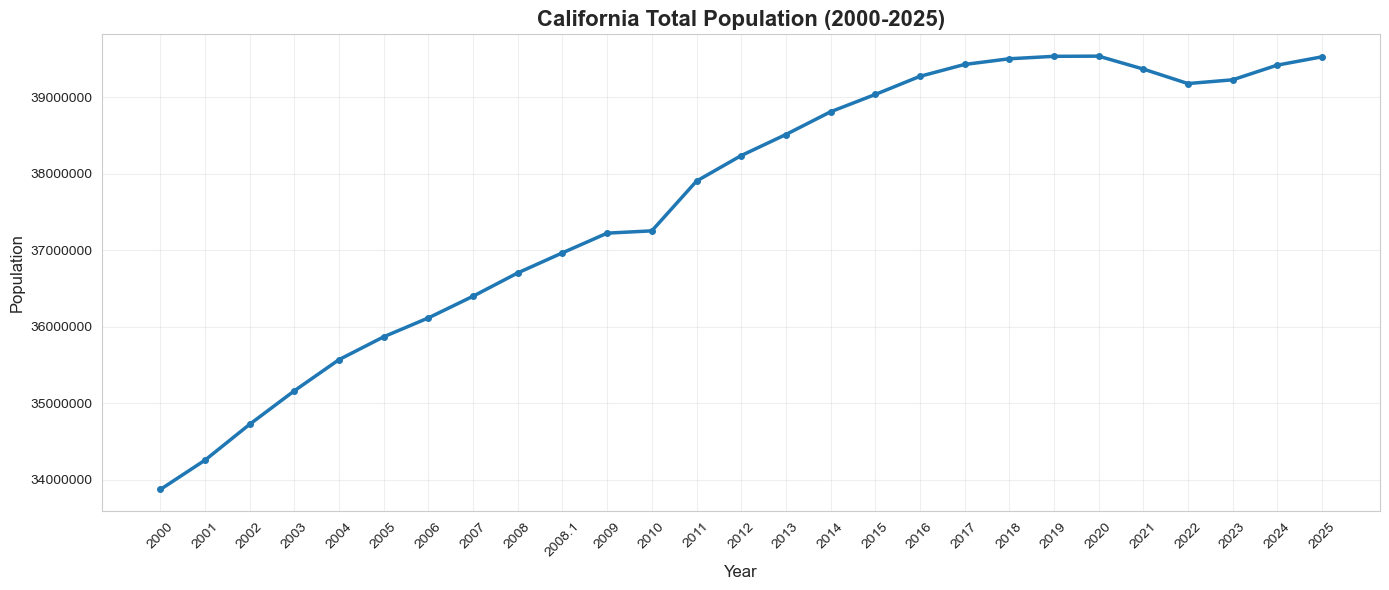

In [4]:
# Calculate California total population by year
year_cols = [col for col in df_population.columns if col != 'COUNTY']
ca_total_by_year = df_population[year_cols].sum()

print("=" * 80)
print("CALIFORNIA TOTAL POPULATION TRENDS (2000-2025)")
print("=" * 80)

print(f"\n📊 Statewide Population:")
print(f"   2000: {ca_total_by_year.iloc[0]:,.0f}")
print(f"   2010: {ca_total_by_year.iloc[10]:,.0f}")
print(f"   2020: {ca_total_by_year.iloc[20]:,.0f}")
print(f"   2025: {ca_total_by_year.iloc[-1]:,.0f}")

print(f"\n📈 Growth:")
growth_2000_2025 = ca_total_by_year.iloc[-1] - ca_total_by_year.iloc[0]
growth_pct = (growth_2000_2025 / ca_total_by_year.iloc[0]) * 100
print(f"   2000-2025: {growth_2000_2025:,.0f} people ({growth_pct:.1f}%)")

# Plot California total population over time
plt.figure(figsize=(14, 6))
plt.plot(year_cols, ca_total_by_year.values, linewidth=2.5, color='#1f77b4', marker='o', markersize=4)
plt.title('California Total Population (2000-2025)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)

## 4. Top Counties Analysis

TOP 10 MOST POPULOUS COUNTIES (2025)
Los Angeles         :    9,876,811
San Diego           :    3,330,139
Orange              :    3,175,427
Riverside           :    2,495,640
San Bernardino      :    2,207,424
Santa Clara         :    1,922,259
Alameda             :    1,662,482
Sacramento          :    1,604,745
Contra Costa        :    1,158,225
Fresno              :    1,037,053


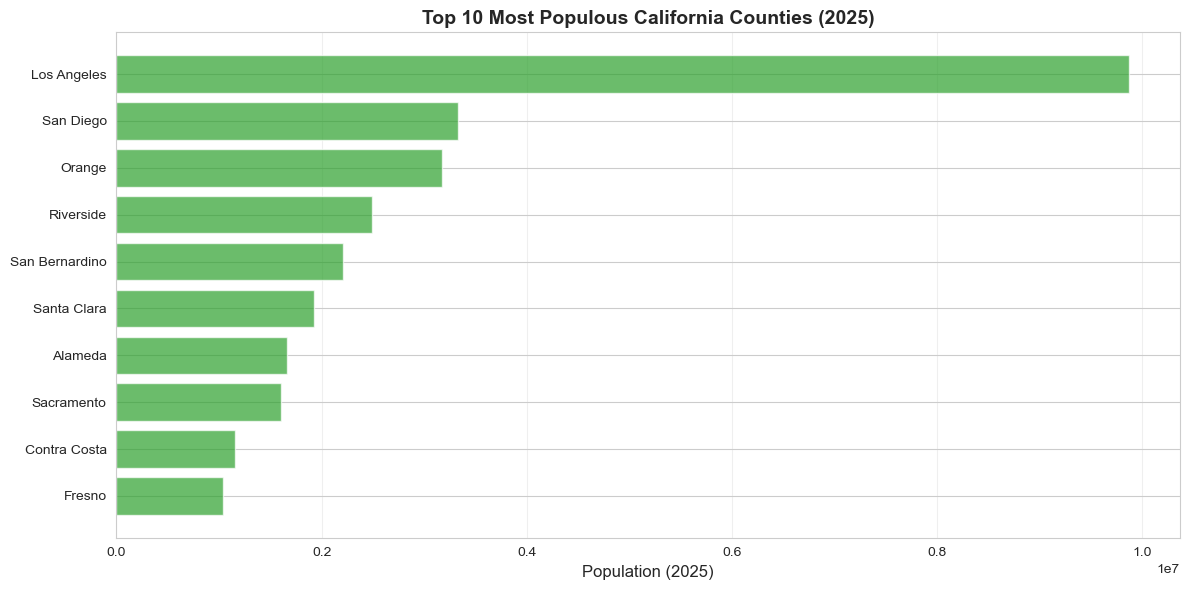



ADDITIONAL POPULATION VISUALIZATIONS


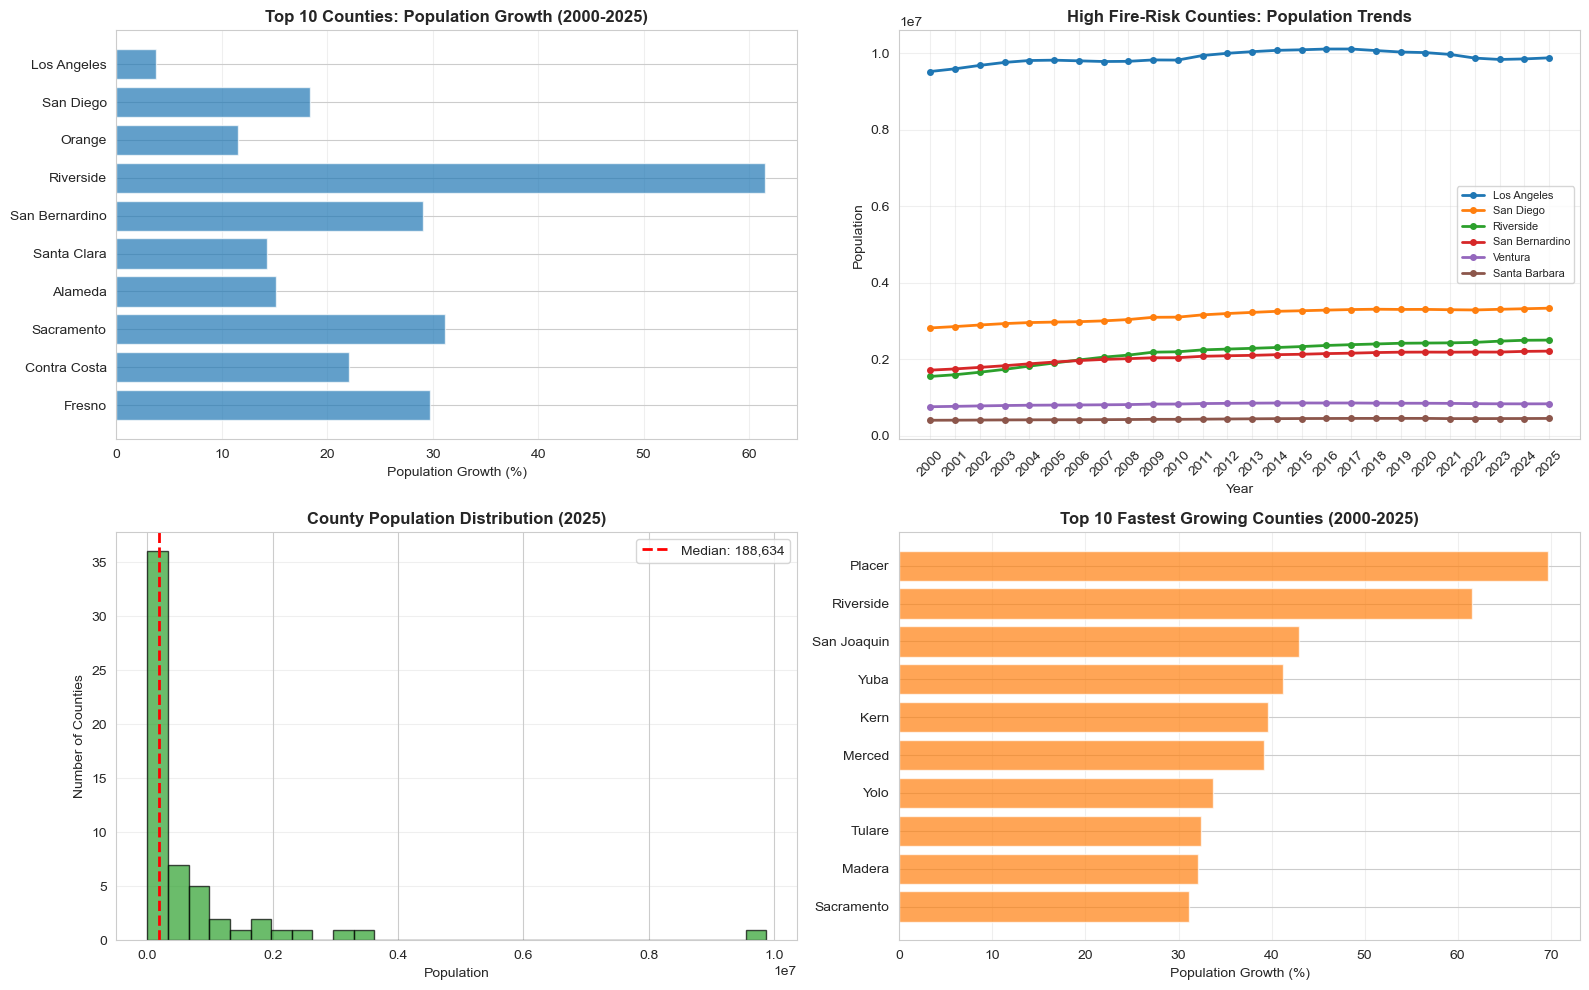


✅ Additional visualizations complete!


In [5]:
# Identify top 10 most populous counties in 2025
df_2025 = df_population[['COUNTY', '2025']].sort_values('2025', ascending=False)

print("=" * 80)
print("TOP 10 MOST POPULOUS COUNTIES (2025)")
print("=" * 80)

for i, row in df_2025.head(10).iterrows():
    print(f"{row['COUNTY']:20s}: {row['2025']:>12,.0f}")

# Plot top 10 counties
plt.figure(figsize=(12, 6))
top_10 = df_2025.head(10)
plt.barh(top_10['COUNTY'], top_10['2025'], color='#2ca02c', alpha=0.7)
plt.xlabel('Population (2025)', fontsize=12)
plt.title('Top 10 Most Populous California Counties (2025)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)

# Additional population visualizations
print("\n" + "=" * 80)
print("ADDITIONAL POPULATION VISUALIZATIONS")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Top 10 Counties Population Growth (2000-2025)
top_10_counties = df_2025.head(10)['COUNTY'].tolist()
growth_data = []
for county in top_10_counties:
    pop_2000 = df_population[df_population['COUNTY'] == county]['2000'].values[0]
    pop_2025 = df_population[df_population['COUNTY'] == county]['2025'].values[0]
    growth_pct = ((pop_2025 - pop_2000) / pop_2000) * 100
    growth_data.append(growth_pct)

axes[0, 0].barh(top_10_counties, growth_data, color='#1f77b4', alpha=0.7)
axes[0, 0].set_xlabel('Population Growth (%)')
axes[0, 0].set_title('Top 10 Counties: Population Growth (2000-2025)', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='x')
axes[0, 0].invert_yaxis()

# 2. Population Trends for Selected High-Fire-Risk Counties
fire_counties = ['Los Angeles', 'San Diego', 'Riverside', 'San Bernardino', 'Ventura', 'Santa Barbara']
for county in fire_counties:
    if county in df_population['COUNTY'].values:
        county_data = df_population[df_population['COUNTY'] == county]
        years = [str(y) for y in range(2000, 2026)]
        pops = county_data[years].values.flatten()
        axes[0, 1].plot(years, pops, marker='o', linewidth=2, markersize=4, label=county)

axes[0, 1].set_title('High Fire-Risk Counties: Population Trends', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Population')
axes[0, 1].legend(fontsize=8)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Population Distribution (2025)
axes[1, 0].hist(df_population['2025'], bins=30, color='#2ca02c', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('County Population Distribution (2025)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Population')
axes[1, 0].set_ylabel('Number of Counties')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].axvline(df_population['2025'].median(), color='red', linestyle='--', 
                   linewidth=2, label=f'Median: {df_population["2025"].median():,.0f}')
axes[1, 0].legend()

# 4. Fastest Growing Counties (2000-2025)
all_growth = []
for idx, row in df_population.iterrows():
    county = row['COUNTY']
    pop_2000 = row['2000']
    pop_2025 = row['2025']
    growth_pct = ((pop_2025 - pop_2000) / pop_2000) * 100
    all_growth.append({'County': county, 'Growth_%': growth_pct})

growth_df = pd.DataFrame(all_growth).sort_values('Growth_%', ascending=False).head(10)
axes[1, 1].barh(growth_df['County'], growth_df['Growth_%'], color='#ff7f0e', alpha=0.7)
axes[1, 1].set_xlabel('Population Growth (%)')
axes[1, 1].set_title('Top 10 Fastest Growing Counties (2000-2025)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\n✅ Additional visualizations complete!")
print("=" * 80)

## 5. Summary for ML Model

In [6]:
print("=" * 80)
print("POPULATION DATA SUMMARY FOR ML MODEL")
print("=" * 80)

print(f"\n📊 Dataset Overview:")
print(f"   Counties: {len(df_population)} (all 58 CA counties)")
print(f"   Years: {len(year_cols)} (2000-2025)")
print(f"   Total data points: {len(df_population) * len(year_cols):,}")
print(f"   Data completeness: {((1 - missing_values / (df_population.shape[0] * df_population.shape[1])) * 100):.1f}%")

print(f"\n📍 Geographic Coverage:")
print(f"   Scope: All 58 California counties")
print(f"   Temporal resolution: Annual (January 1 of each year)")
print(f"   Spatial resolution: County-level")

print(f"\n✅ Data Quality:")
print(f"   Source: CA Department of Finance (official state estimates)")
print(f"   Benchmarks: 2000, 2010, 2020 Census")
print(f"   Methodology: Housing Unit Method + Vital Statistics")
print(f"   Data format: Wide format (counties as rows, years as columns)")

print(f"\n🔥 Fire Prediction Relevance:")
print(f"   ✅ Human-caused fire risk (90-95% of CA wildfires)")
print(f"   ✅ Wildland-Urban Interface (WUI) identification")
print(f"   ✅ Resource allocation and evacuation planning")
print(f"   ✅ Economic impact assessment")
print(f"   ✅ Population growth trends in fire-prone areas")

print(f"\n📝 Next Steps:")
print(f"   1. Reshape to long format (County, Year, Population) for ML")
print(f"   2. Merge with fire data by county and year")
print(f"   3. Calculate population density (population / county area)")
print(f"   4. Create WUI indicators (population near wildlands)")
print(f"   5. Engineer features: population growth rate, density changes")

print("=" * 80)

POPULATION DATA SUMMARY FOR ML MODEL

📊 Dataset Overview:
   Counties: 58 (all 58 CA counties)
   Years: 27 (2000-2025)
   Total data points: 1,566
   Data completeness: 100.0%

📍 Geographic Coverage:
   Scope: All 58 California counties
   Temporal resolution: Annual (January 1 of each year)
   Spatial resolution: County-level

✅ Data Quality:
   Source: CA Department of Finance (official state estimates)
   Benchmarks: 2000, 2010, 2020 Census
   Methodology: Housing Unit Method + Vital Statistics
   Data format: Wide format (counties as rows, years as columns)

🔥 Fire Prediction Relevance:
   ✅ Human-caused fire risk (90-95% of CA wildfires)
   ✅ Wildland-Urban Interface (WUI) identification
   ✅ Resource allocation and evacuation planning
   ✅ Economic impact assessment
   ✅ Population growth trends in fire-prone areas

📝 Next Steps:
   1. Reshape to long format (County, Year, Population) for ML
   2. Merge with fire data by county and year
   3. Calculate population density (popula